In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [2]:
# Load dataset
data = pd.read_excel("Online Retail.xlsx")

In [3]:
# Feature Engineering: Total Spending per Customer
data['TotalSpending'] = data['Quantity'] * data['UnitPrice']
customer_data = data.groupby('CustomerID').agg({'Quantity': 'sum', 'TotalSpending': 'sum'}).reset_index()

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(customer_data[['Quantity', 'TotalSpending']])

In [4]:
# --- K-Means Clustering ---
# Find the optimal K using the Elbow Method
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


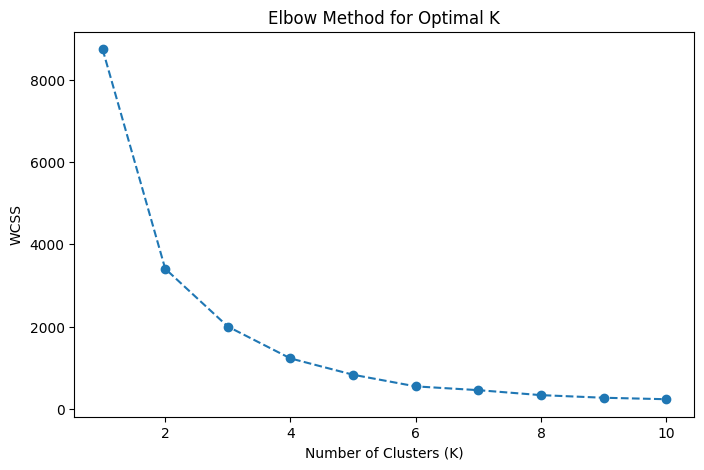

In [5]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [6]:
# Apply K-Means with optimal K (choose based on elbow method, e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
customer_data['Cluster_KMeans'] = kmeans_labels

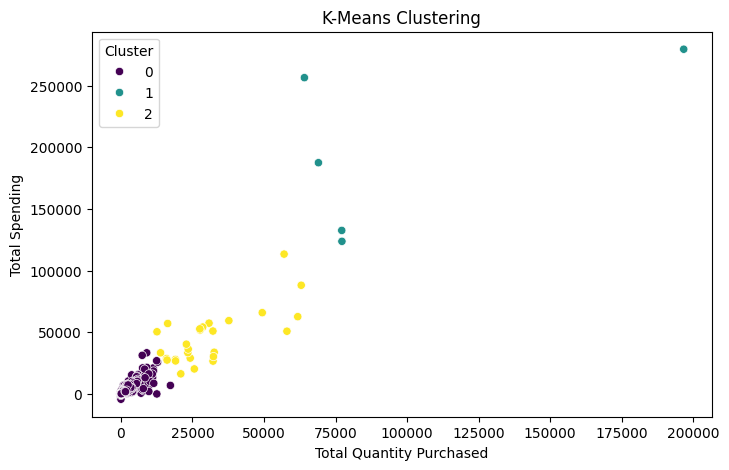

In [7]:
# Visualize K-Means Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=customer_data['Quantity'], y=customer_data['TotalSpending'], hue=kmeans_labels, palette='viridis')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Total Spending')
plt.title('K-Means Clustering')
plt.legend(title='Cluster')
plt.show()

In [8]:
# --- DBSCAN Clustering ---
dbscan = DBSCAN(eps=1, min_samples=5)  # Tune eps and min_samples based on data
dbscan_labels = dbscan.fit_predict(X)
customer_data['Cluster_DBSCAN'] = dbscan_labels


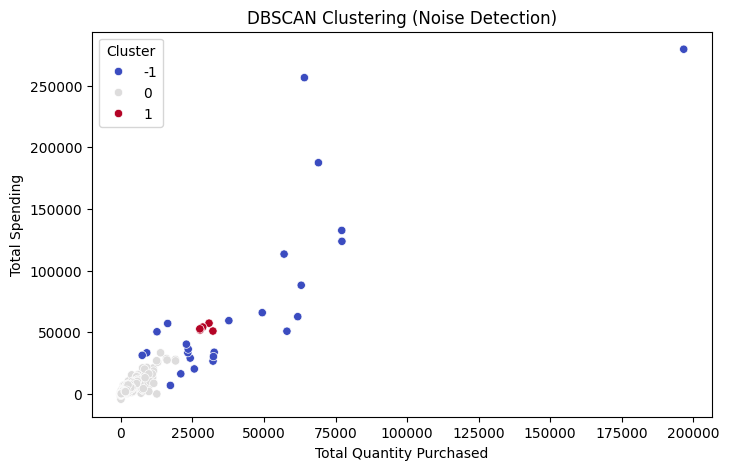

In [9]:

# Visualize DBSCAN Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=customer_data['Quantity'], y=customer_data['TotalSpending'], hue=dbscan_labels, palette='coolwarm')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Total Spending')
plt.title('DBSCAN Clustering (Noise Detection)')
plt.legend(title='Cluster')
plt.show()

In [10]:
# Compare Clustering Methods
print('K-Means Cluster Counts:\n', customer_data['Cluster_KMeans'].value_counts())
print('\nDBSCAN Cluster Counts:\n', customer_data['Cluster_DBSCAN'].value_counts())

K-Means Cluster Counts:
 Cluster_KMeans
0    4340
2      27
1       5
Name: count, dtype: int64

DBSCAN Cluster Counts:
 Cluster_DBSCAN
 0    4342
-1      25
 1       5
Name: count, dtype: int64
